In [4]:
import classy as Class
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.insert(0, '/Users/gabe/projects/recombination/src')
import RunData
from RunData import PCA
from IPython.display import display, clear_output

import scipy.interpolate
import scipy.integrate

######################################################
#  Setting up plots
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

def add_mode(ax, pca, mode, plot_label="", plot_basis=False, plot_points=False, color="black"):
    
    gaussian = lambda z, mu, sig, scal : scal*np.exp(-0.5*((z-mu)/sig)**2)

    zs = np.linspace(pca.zmin, pca.zmax, 1000)

    eigenvec=pca.mode_points(mode)
    
    for i,zi in enumerate(pca.pivots):
        if(plot_basis):
            ax.plot(zs, gaussian(zs, zi, pca.width, eigenvec[i]), color=color, alpha=0.5)
        if(plot_points):
            ax.scatter(zi, gaussian(zi, zi, pca.width, eigenvec[i]), color=color, marker="x", alpha=0.5)


    return ax.plot(zs, pca.mode(mode)(zs), color=color, label=plot_label)

In [5]:
basedir = "/Users/gabe/projects/recombination/data"

key = "PCAplot"
all_data={}
for filename in os.listdir(basedir):
    if(key in filename):
        all_data[filename] =  RunData.RunData(os.path.join(basedir, filename))
        
for name, data in all_data.items():
    print("File {0} has Npert={1} and linear_sampling={2}".format(name, data.Npert, data.linear_sampling))

File Apr07.PCAplot.0 has Npert=80 and linear_sampling=40000


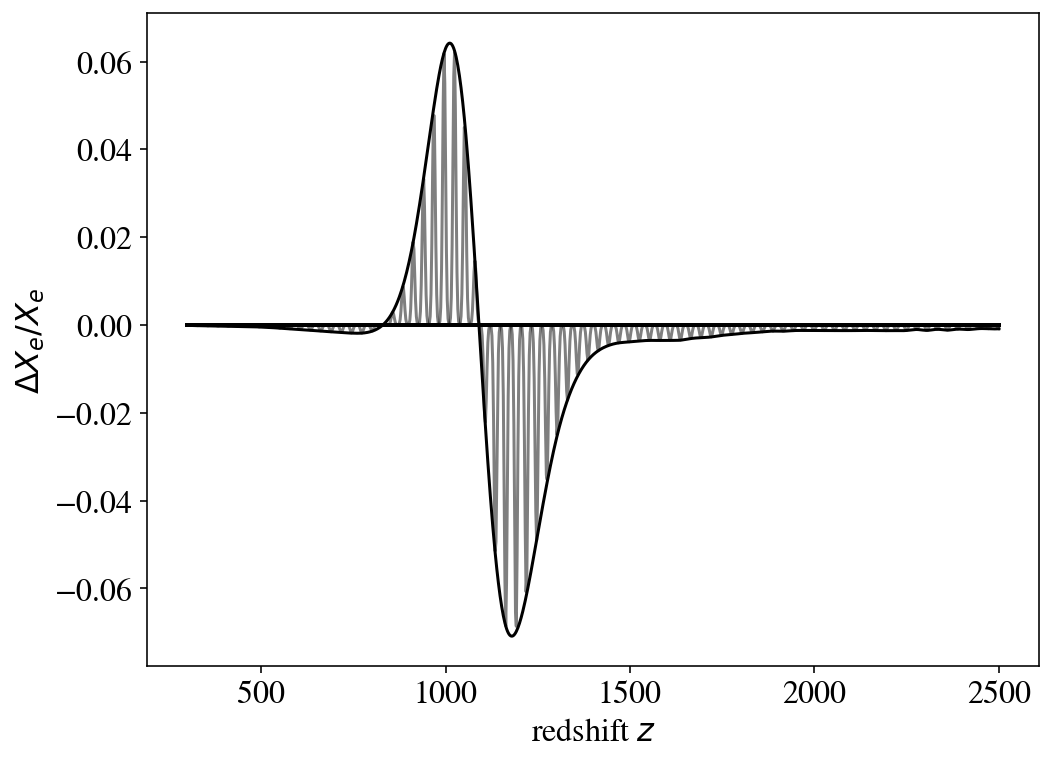

In [6]:
mode=0

fig,ax = plt.subplots()

points=False
basis=True

sublist = [all_data["Apr07.PCAplot.0"]]
colors = ["r", "k", "b", "g"]

marginalized = PCA(all_data["Apr07.PCAplot.0"], fisher='m')

add_mode(ax, marginalized, mode, plot_label="", plot_basis=basis, plot_points=points, color=colors[1])

#ax.plot(zs, marginalized.mode(mode)(zs), linestyle='dotted')

ax.set_xlabel("redshift $z$")
ax.set_ylabel("$\Delta X_e / X_e$")
#plt.legend()
plt.savefig("../results/PCA_interp_example.pdf", dpi=300, bbox_inches='tight')

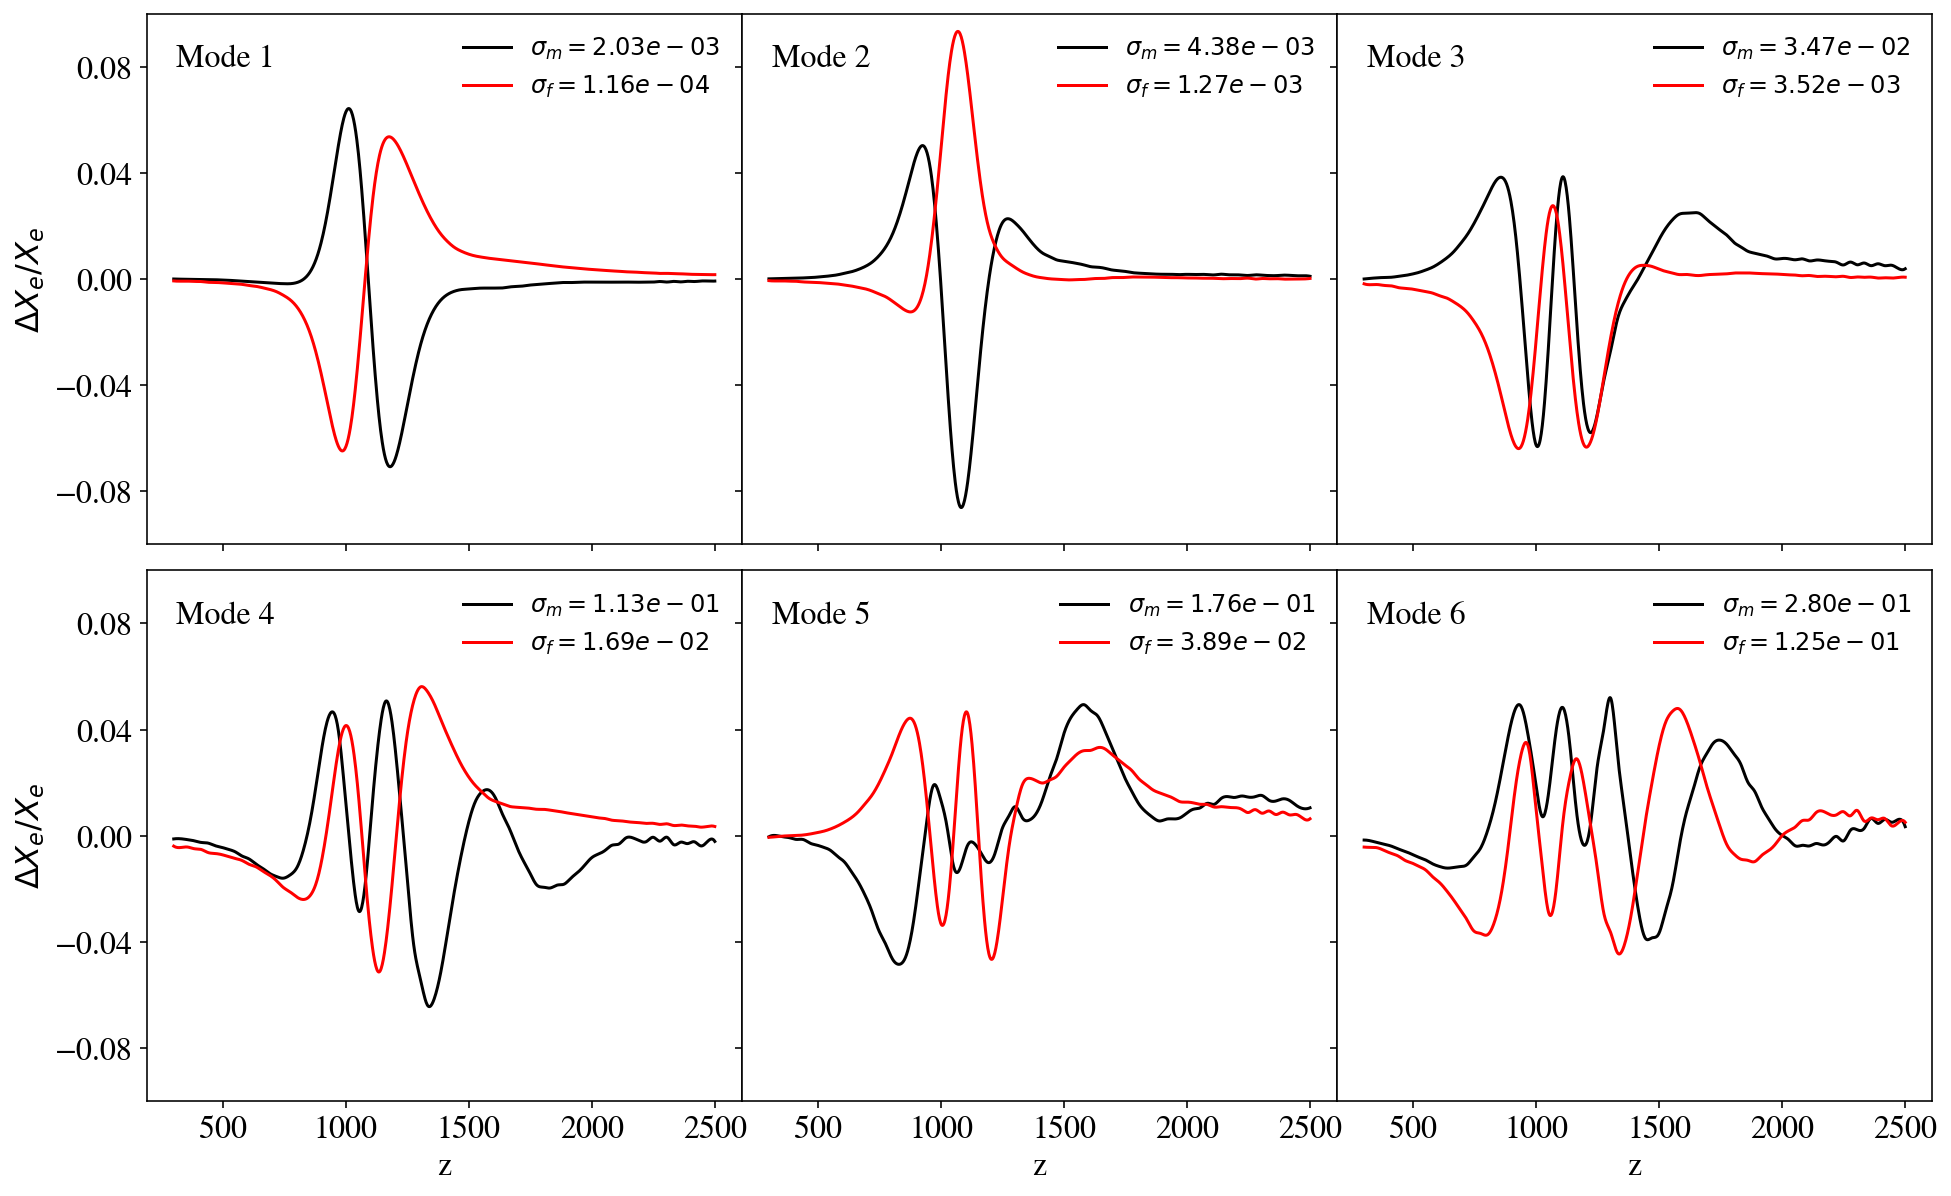

In [11]:
fig,axes =plt.subplots(2,3, sharex='col', sharey='row', figsize=(16,10))
plt.subplots_adjust(hspace=.05, wspace=0)
cmap = plt.get_cmap("tab10")

points=False
basis=False

for i,ax in enumerate(axes.flatten()):
    marginalized = PCA(all_data["Apr07.PCAplot.0"], fisher='m')
    fixed = PCA(all_data["Apr07.PCAplot.0"], fisher='f')

    m_sigma = 1/np.sqrt(marginalized.eigenval(i))
    f_sigma = 1/np.sqrt(fixed.eigenval(i))
    
    add_mode(ax, marginalized, i, plot_label="$\sigma_m={:.2e}$".format(m_sigma), plot_basis=basis, plot_points=points, color="k")
    add_mode(ax, fixed, i, plot_label="$\sigma_f={:.2e}$".format(f_sigma), plot_basis=basis, plot_points=points, color="r")

    ax.text(0.05, 0.9, "Mode {}".format(i+1), transform=ax.transAxes)
    ax.legend(loc='upper right', prop={'size': 12}, frameon=False)
    ytick = [-0.08, -0.04, 0, 0.04, 0.08]
    ax.set_yticks(ytick)
    ax.set_ylim([-0.10, 0.10])
    if(i%3==0):
        ax.set_ylabel("$\Delta X_e / X_e$")
    if(i>2):
        ax.set_xlabel("z")

plt.savefig("../results/PCA_mode_talk_both.png", dpi=300, bbox_inches='tight')